# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.432294e+01     1.596156e+01
 * time: 0.004602193832397461
     1     6.016523e+01     9.662819e+00
 * time: 0.013384103775024414
     2     5.452845e+01     1.297675e+01
 * time: 0.03286600112915039
     3     3.765345e+01     9.168829e+00
 * time: 0.05809521675109863
     4     2.707878e+01     8.187393e+00
 * time: 0.08237910270690918
     5     1.825414e+01     5.555228e+00
 * time: 0.10384917259216309
     6     1.292446e+01     4.862799e+00
 * time: 0.1212151050567627
     7     1.006802e+01     5.499450e+00
 * time: 0.22082114219665527
     8     8.813061e+00     3.043877e+00
 * time: 0.2397770881652832
     9     8.001322e+00     5.454332e+00
 * time: 0.2539801597595215
    10     6.662803e+00     2.949915e+00
 * time: 0.27178001403808594
    11     6.312678e+00     3.352299e+00
 * time: 0.28585004806518555
    12     6.122648e+00     2.858252e+00
 * time: 0.3001291751861572
    13     6.036617e+00     2.362197e+00
 * time: 0

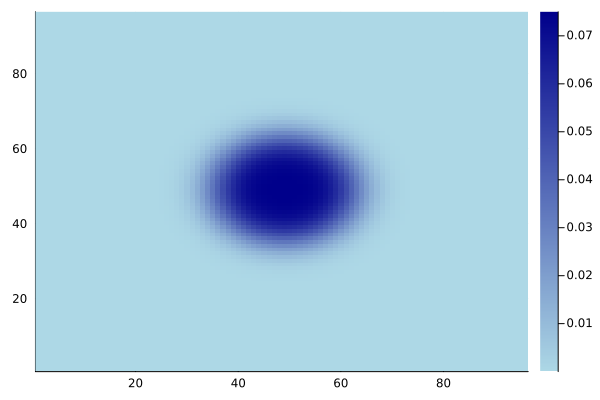

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)